In [228]:
#Previous: default dt, alph = 4._dl in <evolve-scalar.f90>

import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linspace
from scipy.optimize import leastsq
from scipy.optimize import curve_fit

np.set_printoptions(threshold=1024)

 # Lattice Parameters
 # n = 1024, dx = 4.8828125000000000E-002

 # Time Stepping parameters
 # dt = 1.2207031250000000E-002, dt_out =   0.78125000000000000     

 # Phi, PhiDot, GradPhi^2 (FD), V(phi), GradPhi^2 (Spec), V_quad
 # 6 columns in total

n = 1024
dx = 4.8828125000000000E-002 #fixed gap btw. lattice sites
dt_out = 0.78125000000000000 #fixed output for plotting
alph = np.array([1., 2., 4., 8., 16., 32.])
dt = np.zeros(6) #variable dt'=dx/alph, integration time step

for k in range(len(alph)):
    dt[k] = dx/alph[k]
print("dt' = ", dt)

print("xmax= ", n*dx) 
print("ymax= ", 256*dt_out)
#rescale axis for plotting

dt' =  [0.04882812 0.02441406 0.01220703 0.00610352 0.00305176 0.00152588]
xmax=  50.0
ymax=  200.0


fields_alph4.dat


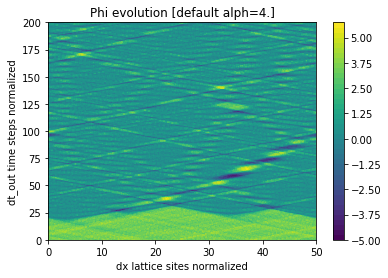

In [229]:
#Part 3, field evolution (default alph, lambda, IC)

fname = "fields_alph4.dat" #default alph = 4._dl
colindex = 0 #Phi col

def read(fname, colindex):
    col1 = np.genfromtxt(fname, usecols = [colindex], dtype = float, unpack = True)
    Phi_single = col1.reshape(-1, 1024)
    return Phi_single

colname = read(fname, colindex) #call read data function
#print(colname) #display selected col data

#X = np.linspace(0, 1024*dx, 1024) # lattice sites
#Y = np.linspace(0, 256*dt_out, 256) # output time steps

def plotter(colname):
    X = np.linspace(0, 1024*dx, 1024) # lattice sites
    Y = np.linspace(0, 256*dt_out, 256) # output time steps
    plt.xlabel('dx lattice sites normalized')
    plt.ylabel('dt_out time steps normalized')
    plt.contourf(X, Y, colname, levels = 50) # rescale x, y axis
    plt.colorbar()
    return "field evolution plot"

plotter(colname) # call plotting function 
plt.title("Phi evolution [default alph=4.]")
plt.savefig('Phi_evo_default.pdf')

print(fname) #check correct file

fields_8710.dat


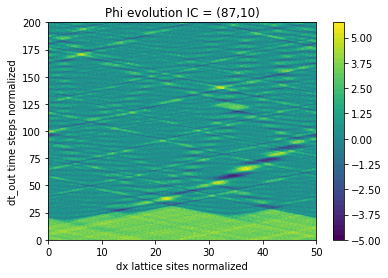

In [230]:
fname = "fields_8710.dat" 
colindex = 0 
#first column for Phi value
# input data from initial condition(IC): 
# (87, 10) -> random seeds in <evolve-scalar.f90>
# default = (87, 18)

plotter(colname) #input Phi column
plt.title("Phi evolution IC = (87,10)")
plt.savefig('Phi_evo_8710.pdf') #pdf/png

print(fname) #check correct file

fields_8719.dat


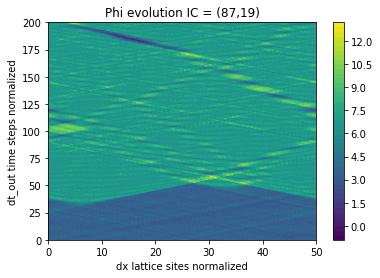

In [231]:
fname = "fields_8719.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution IC = (87,19)")
plt.savefig('Phi_evo_8719.pdf')

print(fname)

fields_8818.dat


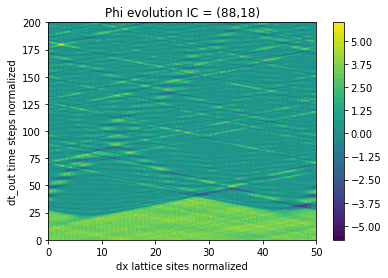

In [232]:
fname = "fields_8818.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution IC = (88,18)")
plt.savefig('Phi_evo_8818.pdf')

print(fname)

fields_8618.dat


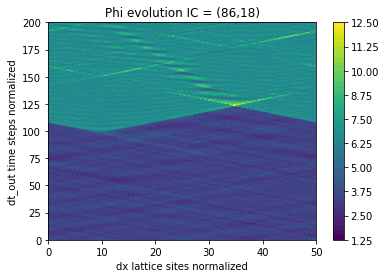

In [233]:
fname = "fields_8618.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution IC = (86,18)")
plt.savefig('Phi_evo_8618.pdf')

print(fname)

fields_8617.dat


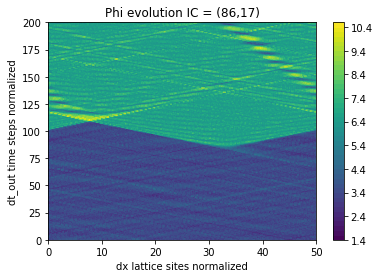

In [234]:
fname = "fields_8617.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution IC = (86,17)")
plt.savefig('Phi_evo_8617.pdf')

print(fname)

fields_lam1.3.dat


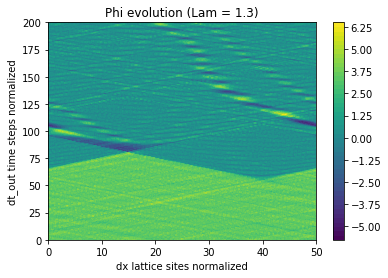

In [235]:
fname = "fields_lam1.3.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution (Lam = 1.3)")
plt.savefig('Phi_evo_L1point3.pdf')

print(fname)

fields_lam1.5.dat


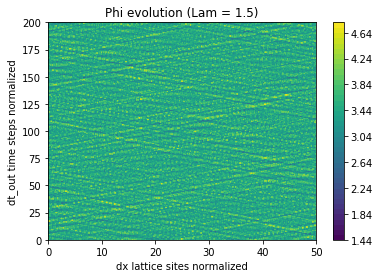

In [236]:
fname = "fields_lam1.5.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution (Lam = 1.5)")
plt.savefig('Phi_evo_L1point5.pdf')

print(fname)

fields_lam1.dat


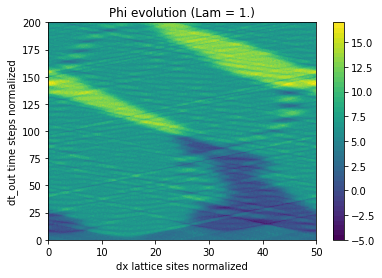

In [237]:
fname = "fields_lam1.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution (Lam = 1.)")
plt.savefig('Phi_evo_L1.pdf')

print(fname)

fields_lam0.9.dat


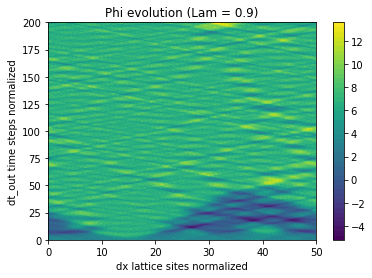

In [238]:
fname = "fields_lam0.9.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution (Lam = 0.9)")
plt.savefig('Phi_evo_Lpoint9.pdf')

print(fname)

fields_lam0.8.dat


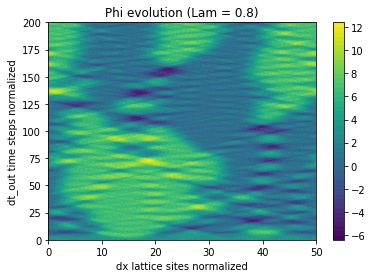

In [239]:
fname = "fields_lam0.8.dat"
colname = read(fname, colindex)
plotter(colname)
plt.title("Phi evolution (Lam = 0.8)")
plt.savefig('Phi_evo_Lpoint8.pdf')

print(fname)

In [240]:
def Energy(fname): #fname = input("Enter file name with alph=1. 2. 4. 8. 16. 32. : ")
    E_eacht = np.zeros(256)
    E_diff = np.zeros(256)#empty arrays
    
    a, b, c, d = np.genfromtxt(fname, usecols = [0, 1, 2, 3], dtype = float, unpack = True)
    #read first cols separately, transposed
    
    E_eachi= 0.5*(b**2) + 0.5*c + d
    # Ei(t) for each lattice site i
    #implement E formula, col1 (Phi) is not used here!
    
    E_splitblock = E_eachi.reshape(-1, 1, 1024)
    # slice into t blocks, 1024 sites = whole system, per block
    
    for i in range(256): # iterate over each of 256 t blocks
        E_eacht[i] = np.sum(E_splitblock[i]) #sum over 1024 sites
        E = E_eacht # E(t) as a whole system for each t block
        
    for j in range(256): # Energy deviation Abs(E(t) - E(t=0))
        E_diff[j] = E[j] - E[0] #before Abs
    E_dev = np.abs(E_diff) #size of volation
    return E_dev

In [241]:
#read alph adjusted data

E_dev_alph1 = Energy("fields_alph1.dat")
E_dev_alph2 = Energy("fields_alph2.dat")
E_dev_alph4 = Energy("fields_alph4.dat")
E_dev_alph8 = Energy("fields_alph8.dat")
E_dev_alph16 = Energy("fields_alph16.dat")
E_dev_alph32 = Energy("fields_alph32.dat")

In [242]:
#plot alph adjusted E deviation
def Eplotter(Edev_data):
    
    X = np.linspace(0, 256*dt_out, 256) # output time steps
    
    plt.ylabel('Absolute deviation of [E(t) - E(t=0)]')
    plt.xlabel('dt_out time steps normalized')
    plt.plot(X, Edev_data)
    return "Absolute E deviation plot"

In [243]:
# power fitting model with 2 parameters a, b

def power(x, a, b): 
    return a*(x**b)

# dt' array for eac alph = 1. 2. 4. 8. 16. 32.
dt_a1 = np.linspace(0, 256*dt_out, 256*dt_out/dt[0])
dt_a2 = np.linspace(0, 256*dt_out, 256*dt_out/dt[1])
dt_a4 = np.linspace(0, 256*dt_out, 256*dt_out/dt[2])
dt_a8 = np.linspace(0, 256*dt_out, 256*dt_out/dt[3])
dt_a16 = np.linspace(0, 256*dt_out, 256*dt_out/dt[4])
dt_a32 = np.linspace(0, 256*dt_out, 256*dt_out/dt[5])

# dt_out array, fixed for each alph
X = np.linspace(0, 256*dt_out, 256)

In [244]:
def fitplotter(xdata, ydata):
    plt.plot(X, ydata, 'b-', label="data")
    popt, pcov = curve_fit(power, X, ydata)
    plt.plot(xdata, power(xdata, *popt), 'r--', label='fit')
    plt.legend()

    a = popt[0]
    b = popt[1]
    variance_a = np.sqrt(pcov[0, 0])
    variance_b = np.sqrt(pcov[1, 1])
    
    print("a= ", a, "b= ", b)
    print("variance in a= ", variance_a, "variance in b= ", variance_b)
    return "power fit"

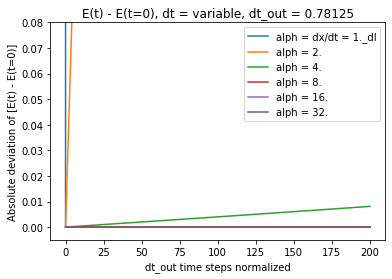

In [245]:
Eplotter(E_dev_alph1)
Eplotter(E_dev_alph2)
Eplotter(E_dev_alph4)
Eplotter(E_dev_alph8)
Eplotter(E_dev_alph16)
Eplotter(E_dev_alph32)

plt.ylim(-0.005, 0.08)
# cannot show all curves in one single figure

plt.title('E(t) - E(t=0), dt = variable, dt_out = 0.78125')
plt.legend(["alph = dx/dt = 1._dl","alph = 2.","alph = 4.", "alph = 8.", "alph = 16.", "alph = 32." ])

plt.savefig("E_dev_alph_all.pdf")

0.01220703125
a=  3.806525952273028e-05 b=  1.0112464900902447
variance in a=  4.926164665760956e-08 variance in b=  0.00025984478598230394


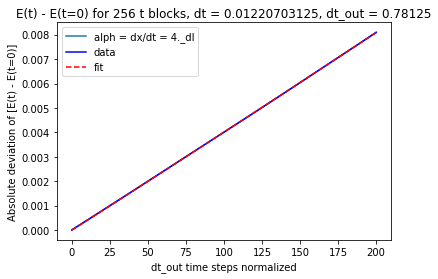

In [253]:
Edev_data = E_dev_alph4
print(dt[2]) # dt is integration step =! dt_out
Eplotter(Edev_data)

plt.title('E(t) - E(t=0) for 256 t blocks, dt = 0.01220703125, dt_out = 0.78125')
plt.legend(["alph = dx/dt = 4._dl"])

#Part 3 default E_dev plot

xdata = dt_a4
ydata = Edev_data
fitplotter(xdata, ydata)
plt.legend(["alph = dx/dt = 4._dl", "data", "fit"])
plt.savefig("E_dev_alph=4.pdf")

0.048828125
a=  10.602758353603408 b=  0.9284230020840291
variance in a=  0.06399188305764174 variance in b=  0.0012161773882991493


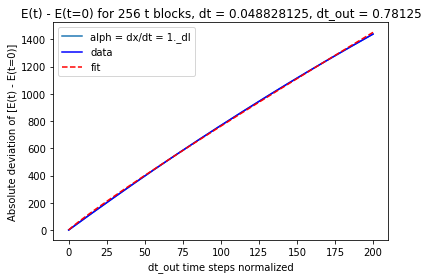

In [247]:
Edev_data = E_dev_alph1
print(dt[0])
Eplotter(Edev_data)

plt.title('E(t) - E(t=0) for 256 t blocks, dt = 0.048828125, dt_out = 0.78125')
plt.savefig("E_dev_alph=1")

xdata = dt_a1
ydata = Edev_data
fitplotter(xdata, ydata)
plt.legend(["alph = dx/dt = 1._dl", "data", "fit"])
plt.savefig("E_dev_alph=1.pdf")

0.0244140625
a=  0.018630670705816702 b=  1.0109213266910206
variance in a=  2.407961020066436e-05 variance in b=  0.0002595139006423401


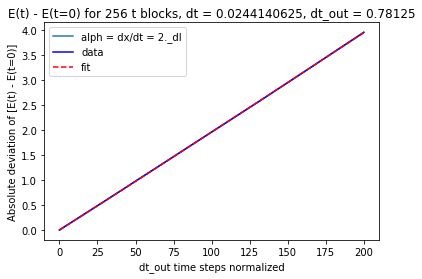

In [248]:
Edev_data = E_dev_alph2
print(dt[1])
Eplotter(Edev_data)

plt.title('E(t) - E(t=0) for 256 t blocks, dt = 0.0244140625, dt_out = 0.78125')
plt.savefig("E_dev_alph=2")

xdata = dt_a2
ydata = Edev_data
fitplotter(xdata, ydata)
plt.legend(["alph = dx/dt = 2._dl", "data", "fit"])
plt.savefig("E_dev_alph=2.pdf")

0.006103515625
a=  7.518439734301048e-08 b=  1.0113037509049903
variance in a=  9.774054216534335e-11 variance in b=  0.00026102366375408743


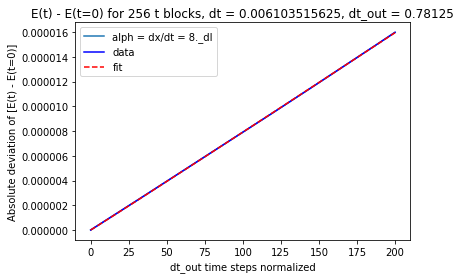

In [249]:
Edev_data = E_dev_alph8
print(dt[3])
Eplotter(Edev_data)

plt.title('E(t) - E(t=0) for 256 t blocks, dt = 0.006103515625, dt_out = 0.78125')
plt.savefig("E_dev_alph=8")

xdata = dt_a8
ydata = Edev_data
fitplotter(xdata, ydata)
plt.legend(["alph = dx/dt = 8._dl", "data", "fit"])
plt.savefig("E_dev_alph=8.pdf")

0.0030517578125
a=  1.491461441456291e-10 b=  1.0100327742225275
variance in a=  1.9268910740567703e-13 variance in b=  0.00025941829771205713


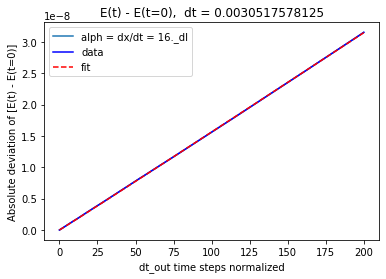

In [250]:
Edev_data = E_dev_alph16
print(dt[4])
Eplotter(Edev_data)

plt.title('E(t) - E(t=0),  dt = 0.0030517578125')
plt.savefig("E_dev_alph=16")

xdata = dt_a16
ydata = Edev_data
fitplotter(xdata, ydata)
plt.legend(["alph = dx/dt = 16._dl", "data", "fit"])
plt.savefig("E_dev_alph=16.pdf")

0.00152587890625
a=  4.536382704491759e-12 b=  0.43958522959196344
variance in a=  9.779725615107901e-13 variance in b=  0.04494772648088325


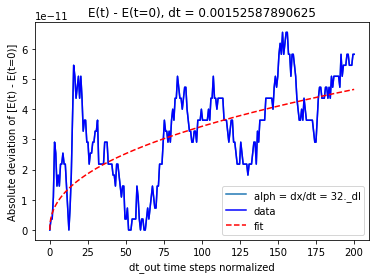

In [252]:
Edev_data = E_dev_alph32
print(dt[5])
Eplotter(Edev_data)

plt.title('E(t) - E(t=0), dt = 0.00152587890625')
plt.savefig("E_dev_alph=32")

xdata = dt_a32
ydata = Edev_data
fitplotter(xdata, ydata)
plt.legend(["alph = dx/dt = 32._dl", "data", "fit"])
plt.savefig("E_dev_alph32.pdf")